In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')


In [ ]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


Text(0, 0.5, 'Close')

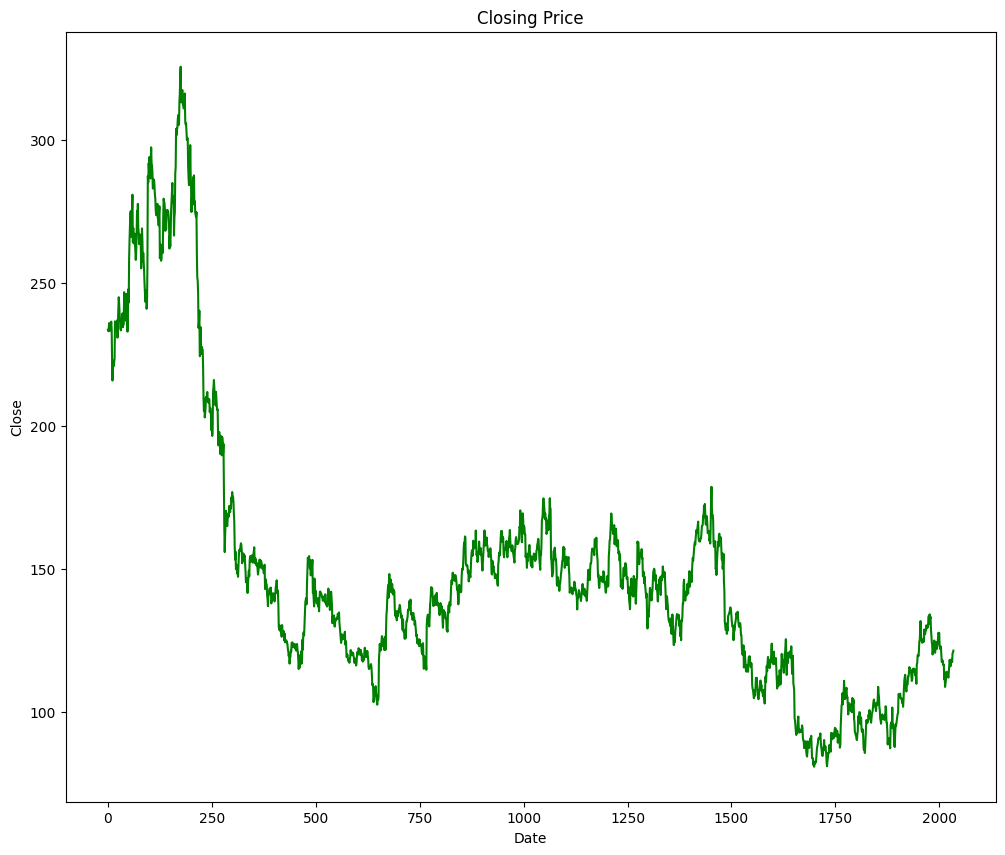

In [ ]:
plt.figure(figsize = (12,10))
plt.title('Closing Price')
plt.plot(df['Close'],'g')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close',fontsize=10)

<Axes: >

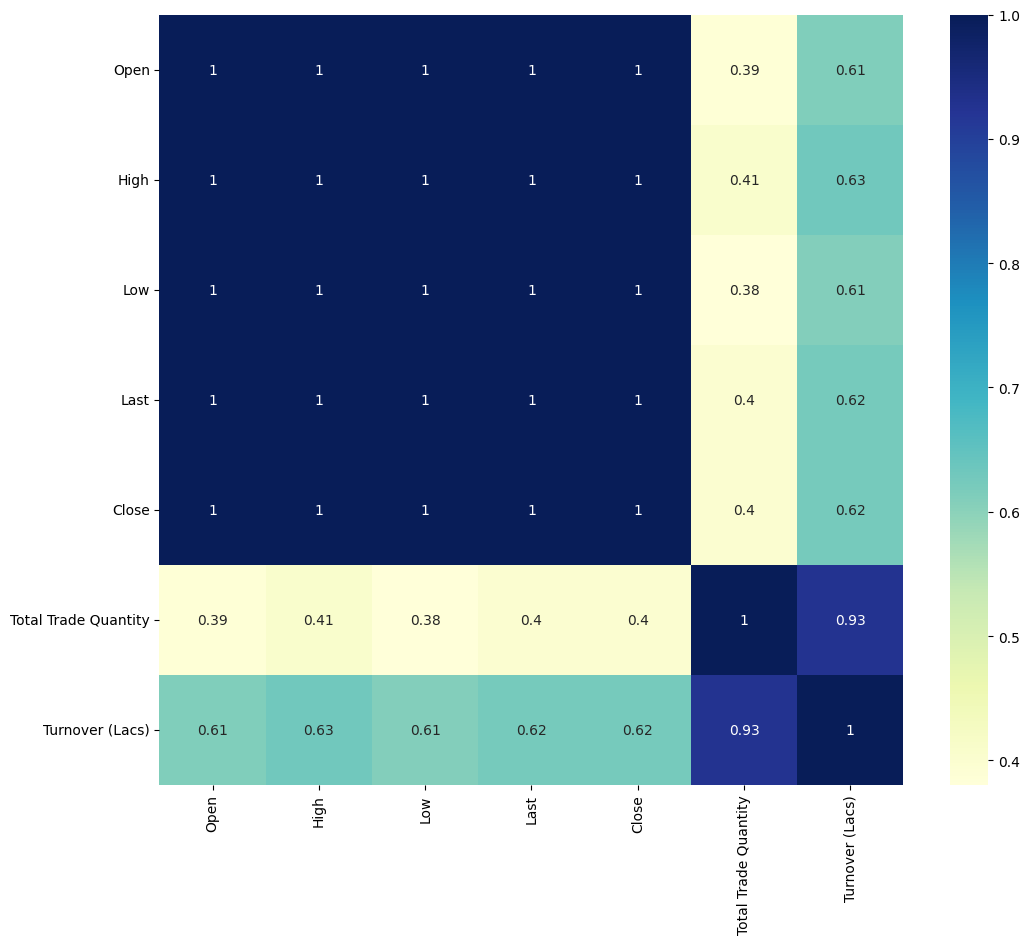

In [ ]:
dcorr = df.corr()
top_corr_features = dcorr.index
plt.figure(figsize=(12,10))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="YlGnBu")

MINMAXSCALER

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [ ]:
data_close = df.reset_index()['Close']
data_close.head()
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))

**Training and testing data**

In [ ]:
train_size = int(len(data_close)*0.70)
test_size = len(data_close) - train_size
train, test = data_close[0 : train_size, :], data_close[train_size : len(data_close), :1]

In [ ]:
def create_matrix(ds, time_step=1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
step=50 
X_train, y_train = create_matrix(train, step)
X_test, y_test = create_matrix(test, step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1373, 50) (1373,)
(560, 50) (560,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

LSTM MODEL

In [ ]:
model = Sequential()
model.add(LSTM(25, return_sequences=True,input_shape=(50,1)))
model.add(LSTM(25,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2700      
                                                                 
 lstm_1 (LSTM)               (None, 50, 25)            5100      
                                                                 
 lstm_2 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 12,926
Trainable params: 12,926
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=60, batch_size=70, verbose=1, shuffle=True).history

Epoch 1/60
16/16 [==============================] - 9s 171ms/step - loss: 0.0691 - val_loss: 0.0207
Epoch 2/60
16/16 [==============================] - 2s 121ms/step - loss: 0.0133 - val_loss: 0.0037
Epoch 3/60
16/16 [==============================] - 2s 96ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 4/60
16/16 [==============================] - 1s 74ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 5/60
16/16 [==============================] - 1s 72ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 6/60
16/16 [==============================] - 1s 74ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 7/60
16/16 [==============================] - 1s 73ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 8/60
16/16 [==============================] - 1s 72ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 9/60
16/16 [==============================] - 1s 77ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 10/60
16/16 [==============================] - 1s 72ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 1

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

18/18 [==============================] - 0s 16ms/step


In [ ]:
import math
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test,test_predict))

113.8072161338494

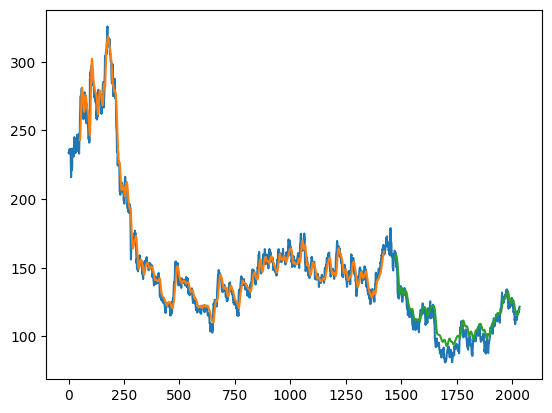

In [ ]:

look_back = 50
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

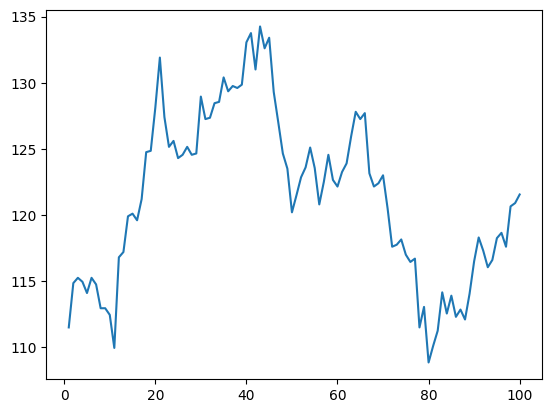

In [ ]:
### Future Prediction Model
x_inum_pyut=test[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
plt.plot(day_new, scaler.inverse_transform(data_close[1935 : ]))